# Basic Exploratory Data Analysis (EDA)

## Preparar la conexión a Kaggle

In [ ]:
# subir el archivo kaggle.json
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
# Descargar csv's
!kaggle datasets download -d roqueto/inseguridad
!kaggle datasets download -d roqueto/delitos
!unzip -q delitos.zip -d .
!unzip -q inseguridad.zip -d .

  0% 0.00/113k [00:00<?, ?B/s]
100% 113k/113k [00:00<00:00, 40.7MB/s]
  0% 0.00/1.18k [00:00<?, ?B/s]
100% 1.18k/1.18k [00:00<00:00, 1.04MB/s]


In [ ]:
# Visualizar datasets
!head inseguridad.csv
!head delitos.csv

Anio,Entidad,Porcentaje
2015,Estados Unidos Mexicanos,73.2
2015,Aguascalientes,43.2
2015,Baja California,53.2
2015,Baja California Sur,61.8
2015,Campeche,53.7
2015,Coahuila de Zaragoza,74.9
2015,Colima,56.5
2015,Chiapas,54.6
2015,Chihuahua,73.6
A�o,Clave_Ent,Entidad,Bien jur�dico afectado,Tipo de delito,Subtipo de delito,Modalidad,Marzo,Abril
2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,2,1
2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,0,0
2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,2,2
2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,0,1
2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,0
2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma blanca,0,0
2015,1,Aguascalientes,La vida y la 

## Conociendo los datos

In [8]:
# Librerías a utilizar
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from pandas.api.types import is_string_dtype, is_numeric_dtype

In [ ]:
dataInseguridad = pd.read_csv('inseguridad.csv', encoding='latin-1')
dataDelitos = pd.read_csv('delitos.csv', encoding='latin-1')
dataInseguridad.head()

,Anio,Entidad,Porcentaje
0,2015,Estados Unidos Mexicanos,73.2
1,2015,Aguascalientes,43.2
2,2015,Baja California,53.2
3,2015,Baja California Sur,61.8
4,2015,Campeche,53.7


In [ ]:
dataDelitos.head()

,Año,Clave_Ent,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Marzo,Abril
0,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,2,1
1,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,0,0
2,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,2,2
3,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,0,1
4,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,0


Los datos de percepción de inseguridad son correctos, pero los datos de incidencias de delitos tratan a cada mes como una variable. Vamos a crear una única variable llamada "Mes", y otra variable "Incidencias" que contendrá el número de incidencias del delito en el mes.

In [ ]:
# Hacemos una copia de los datos para preservar el dataset original
dfDelitos = dataDelitos.copy()
dfNuevo = []
print("Cantidad de filas: ", len(dataDelitos))
colsDelito = ['Año', 'Clave_Ent', 'Entidad', 'Bien jurídico afectado', 'Tipo de delito', 'Subtipo de delito', 'Modalidad']
colsMes = ['Marzo', 'Abril']
for i in range(0, len(dataDelitos)):
  if ((i % 1000) == 0):
    print("Llevamos ", i, " datos")
  # Obtenemos cada fila de las columnas de mes
  rowIncidencias = dfDelitos[colsMes].iloc[i]
  for j in range(0, len(rowIncidencias)):
    rowDelito = {}
  # Obtenemos cada fila sin las columnas de mes
    rowDelito = dfDelitos[colsDelito].iloc[i]
    rowDelito['Mes'] = rowIncidencias.index[j]
    rowDelito['Incidencias'] = rowIncidencias[j]
    dfNuevo.append(rowDelito)
df1 = pd.DataFrame(dfNuevo)
dataDelitos = df1
dataDelitos.head()
dataDelitos.to_csv('nuevoDF.csv')

Cantidad de filas:  15680
Llevamos  0  datos
Llevamos  1000  datos
Llevamos  2000  datos
Llevamos  3000  datos
Llevamos  4000  datos
Llevamos  5000  datos
Llevamos  6000  datos
Llevamos  7000  datos
Llevamos  8000  datos
Llevamos  9000  datos
Llevamos  10000  datos
Llevamos  11000  datos
Llevamos  12000  datos
Llevamos  13000  datos
Llevamos  14000  datos
Llevamos  15000  datos


In [ ]:
from google.colab import drive
#drive.mount('drive')
dataDelitos = df1
#!cp nuevoDF.csv "drive/My Drive/"

In [ ]:
dataInseguridad.info()
dataDelitos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Anio        165 non-null    int64  
 1   Entidad     165 non-null    object 
 2   Porcentaje  165 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 31360 entries, 0 to 15679
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Año                     31360 non-null  int64 
 1   Clave_Ent               31360 non-null  int64 
 2   Entidad                 31360 non-null  object
 3   Bien jurídico afectado  31360 non-null  object
 4   Tipo de delito          31360 non-null  object
 5   Subtipo de delito       31360 non-null  object
 6   Modalidad               31360 non-null  object
 7   Mes                     31360 non-null  object
 

In [ ]:
dataInseguridad.describe()

,Anio,Porcentaje
count,165.000000,165.000000
mean,2017.000000,70.365455
std,1.418519,13.988365
min,2015.000000,27.200000
25%,2016.000000,60.500000
50%,2017.000000,72.000000
75%,2018.000000,81.900000
max,2019.000000,91.900000


In [ ]:
dataDelitos.describe()

,Año,Clave_Ent,Incidencias
count,31360.000000,31360.00000,31360.000000
mean,2017.000000,16.50000,50.443144
std,1.414236,9.23324,199.012218
min,2015.000000,1.00000,0.000000
25%,2016.000000,8.75000,0.000000
50%,2017.000000,16.50000,1.000000
75%,2018.000000,24.25000,24.000000
max,2019.000000,32.00000,8383.000000


## Feature Engineering

In [ ]:
numericalInseguridad = []
categoricalInseguridad = []

for column in dataInseguridad:
  if is_numeric_dtype(dataInseguridad[column]):
    numericalInseguridad.append(column)
  
  elif is_string_dtype(dataInseguridad[column]):
    categoricalInseguridad.append(column)

print('numerical variables: ', numericalInseguridad)
print('categorical variables: ', categoricalInseguridad)

numerical variables:  ['Anio', 'Porcentaje']
categorical variables:  ['Entidad']


In [ ]:
numericalDelitos = []
categoricalDelitos = []

for column in dataDelitos:
  if is_numeric_dtype(dataDelitos[column]):
    numericalDelitos.append(column)
  
  elif is_string_dtype(dataDelitos[column]):
    categoricalDelitos.append(column)

print('numerical variables: ', numericalDelitos)
print('categorical variables: ', categoricalDelitos)

numerical variables:  ['Año', 'Clave_Ent', 'Incidencias']
categorical variables:  ['Entidad', 'Bien jurídico afectado', 'Tipo de delito', 'Subtipo de delito', 'Modalidad', 'Mes']


## Análisis univariable

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0, flags=flags)


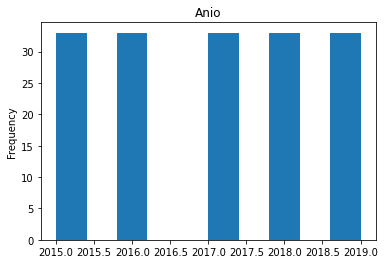

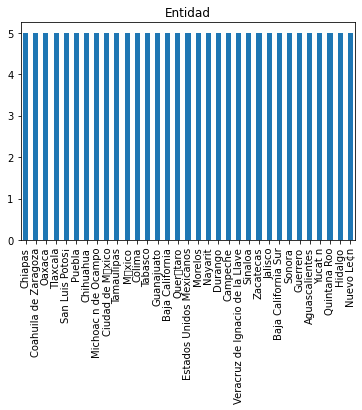

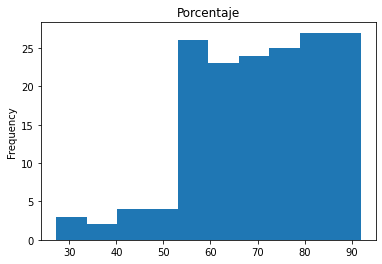

In [ ]:
for column in dataInseguridad:
  plt.figure(column)
  plt.title(column)

  # numerical variables → histogram
  if column in numericalInseguridad:
    dataInseguridad[column].plot(kind='hist')

  # categorical variables → bar chart
  elif column in categoricalInseguridad:
    dataInseguridad[column].value_counts().plot(kind='bar')

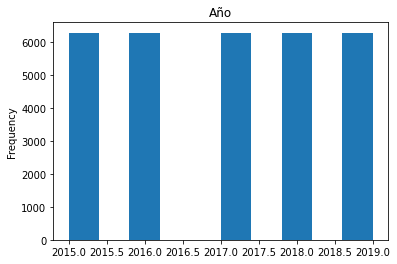

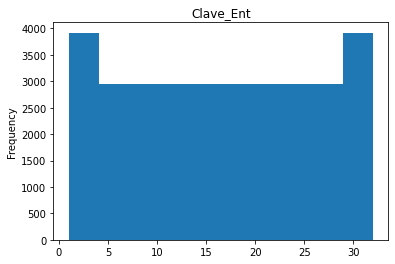

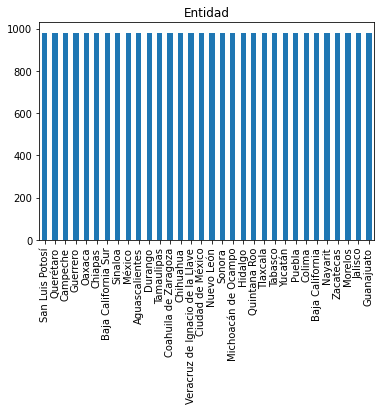

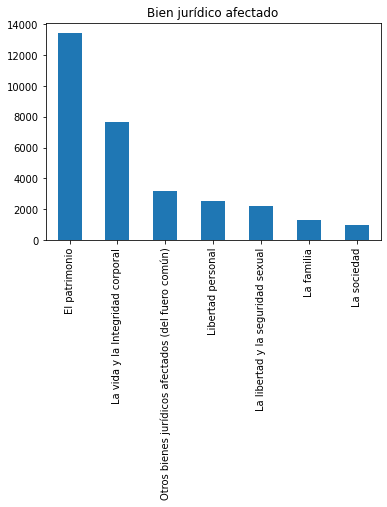

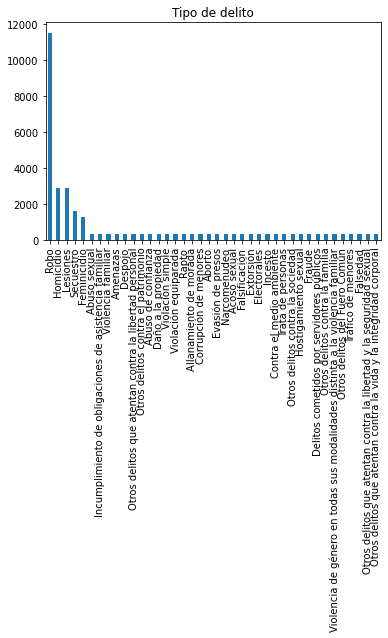

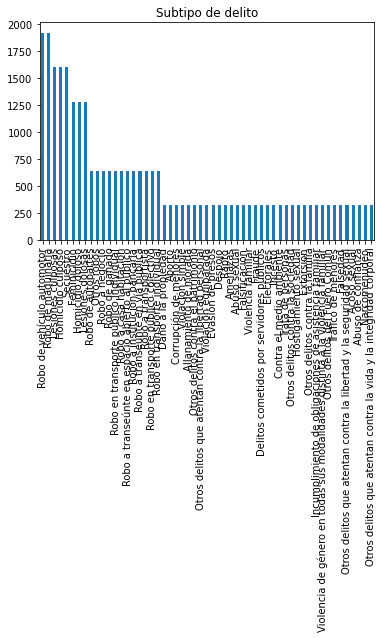

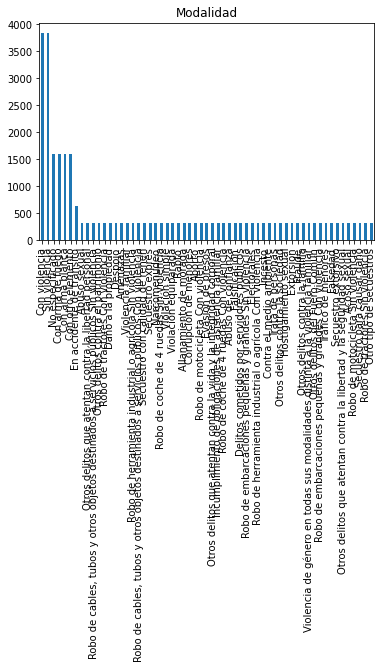

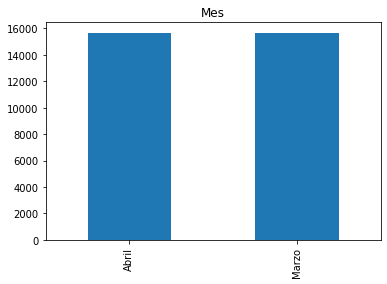

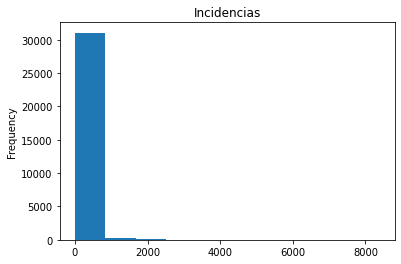

In [ ]:
for column in dataDelitos:
  plt.figure(column)
  plt.title(column)

  # numerical variables → histogram
  if column in numericalDelitos:
    dataDelitos[column].plot(kind='hist')

  # categorical variables → bar chart
  elif column in categoricalDelitos:
    dataDelitos[column].value_counts().plot(kind='bar')

## Análisis multivariable

### Numerical vs Numerical

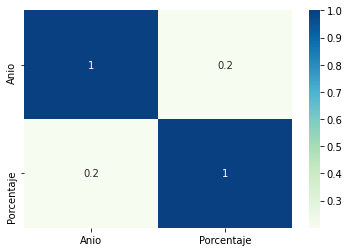

In [ ]:
# heatmap
correlationInseguridad = dataInseguridad.corr()
sns.heatmap(correlationInseguridad, cmap='GnBu', annot=True)

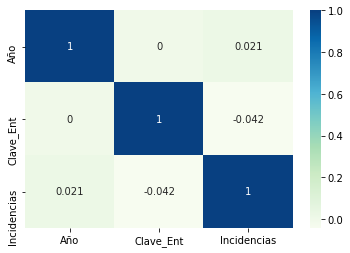

In [ ]:
# heatmap
correlationDelitos = dataDelitos.corr()
sns.heatmap(correlationDelitos, cmap='GnBu', annot=True)

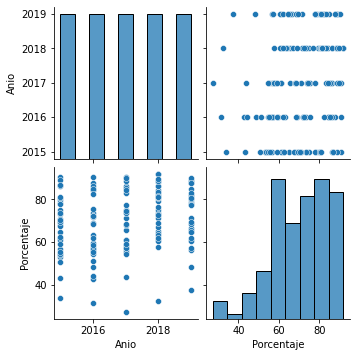

In [ ]:
# pairplot
sns.pairplot(dataInseguridad, height=2.5)

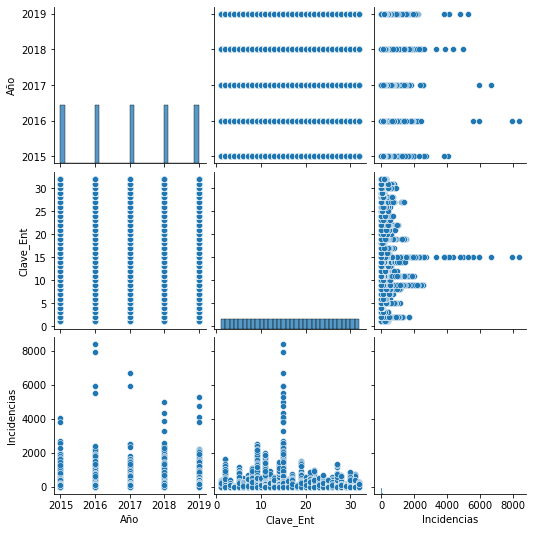

In [ ]:
# pairplot
sns.pairplot(dataDelitos, height=2.5)

# Comprobando hipótesis

Para realizar un análisis de clustering necesitamos la gráfica de dispersión entre la variable X y Y. Para relacionar solo un valor de Y con un valor de X, sumamos los valores de las incidencias sucedidas en cada estado en un año.

In [ ]:
df2 = dataDelitos.copy()
dfNuevo = []
print("Cantidad de filas: ", len(dataDelitos))
colsDelito = ['Año', 'Clave_Ent', 'Entidad', 'Bien jurídico afectado', 'Tipo de delito', 'Subtipo de delito', 'Modalidad', 'Mes', 'Incidencias']
colsNuevo = ['Año', 'Clave_Ent', 'Entidad']
valoresAnio = df2.Año.unique()
print("Años: ", valoresAnio)
valoresEntidad = df2.Clave_Ent.unique()
print("Entidades: ", valoresEntidad)
totalIncidencias = 0
fila = 0
for anio in valoresAnio:
    for entidad in valoresEntidad:
        for i in range(0, len(df2)):  # Recorremos los registros
          rowDelito = df2[colsDelito].iloc[i]
          if rowDelito['Año'] == anio and rowDelito['Clave_Ent'] == entidad:
            fila = i
            totalIncidencias += rowDelito['Incidencias']
        rowTotal = df2[colsNuevo].iloc[fila]
        rowTotal['Total'] = totalIncidencias
        print(rowTotal)
        dfNuevo.append(rowTotal)
        totalIncidencias = 0
df3 = pd.DataFrame(dfNuevo)
dataDelitos = df3
dataDelitos.head()
dataDelitos.to_csv('nuevoDF2.csv')
#drive.mount('drive')
!cp nuevoDF2.csv "drive/My Drive/"

Cargamos los datos para realizar el clustering

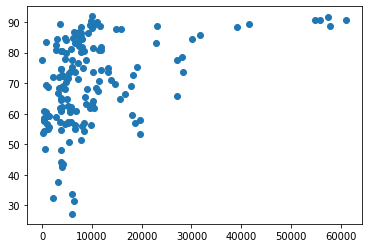

In [58]:
#dataInseguridad = pd.read_csv('inseguridad.csv', encoding='latin-1')
#dataDelitos = pd.read_csv('delitos.csv', encoding='latin-1')
X = dataDelitos["Total"]
Y = dataInseguridad["Porcentaje"]
df = pd.DataFrame()
df['Incidencias'] = X
df['Porcentaje'] = Y
plt.scatter(x="Incidencias", y="Porcentaje", data=df)

Utilizamos la librería Sklearn para realizar el clustering

In [50]:
import sklearn.cluster as cluster
kmeans = cluster.KMeans(n_clusters=3, init='k-means++')
kmeans = kmeans.fit(df[['Incidencias', 'Porcentaje']])
kmeans.cluster_centers_

array([[ 5860.42424242,    68.73257576],
       [52504.28571429,    90.        ],
       [20990.04761905,    72.82857143]])

In [60]:
df['Clusters'] = kmeans.labels_
df.head()

,Incidencias,Porcentaje,Entidad,Clusters
0,3987,43.2,Aguascalientes,0
1,19569,53.2,Baja California,2
2,3612,61.8,Baja California Sur,0
3,259,53.7,Campeche,0
4,8136,74.9,Coahuila de Zaragoza,0


In [52]:
df['Clusters'].value_counts()

0    132
2     21
1      7
Name: Clusters, dtype: int64

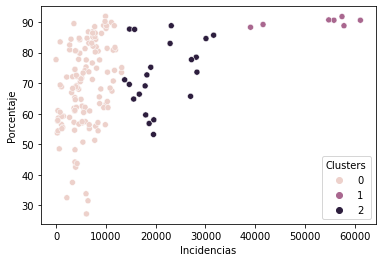

In [53]:
sns.scatterplot(x="Incidencias", y="Porcentaje", hue='Clusters', data=df)

In [71]:
df['Entidad'] = dataDelitos["Entidad"]
df['Anio'] = dataDelitos["AÃ±o"]
df.to_csv('clusters.csv')